In [19]:
#필요 라이브러리 import
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 카페 폐업률 생존분석

1. Kaplan-Mieier 생존곡선(비모수적)
2. Cox 비례위험모형(반모수적)

## 1. Kaplan-Meier 생존 곡선

In [20]:
# 데이터 불러오기
data = pd.read_csv("df_all.csv", index_col = 0)
data

,area,franchise,small_area,closed,period_month,univ_count,univ_area,univ_pop
0,53.00,0,0,1,0,3.0,1049479.0,22578.0
1,6.60,0,1,1,0,NaN,NaN,NaN
2,36.00,0,0,1,0,NaN,NaN,NaN
3,12.23,0,1,1,0,NaN,NaN,NaN
4,56.00,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57011,152.50,1,0,0,153,NaN,NaN,NaN
57012,8.25,1,1,0,154,NaN,NaN,NaN
57013,169.60,1,0,0,298,NaN,NaN,NaN
57014,59.49,1,0,0,328,NaN,NaN,NaN


### (1) 데이터 확인하기

In [21]:
data['period_month'].value_counts()

period_month
0      1410
24      765
12      756
7       752
5       718
       ... 
627       1
483       1
795       1
622       1
645       1
Name: count, Length: 632, dtype: int64

In [22]:
#데이터 형태 파악
data.shape

(57016, 8)

In [23]:
#데이터 자료형 확인
data.dtypes

area            float64
franchise         int64
small_area        int64
closed            int64
period_month      int64
univ_count      float64
univ_area       float64
univ_pop        float64
dtype: object

In [24]:
#데이터 결측치 확인
data.isnull().sum()

area                0
franchise           0
small_area          0
closed              0
period_month        0
univ_count      45655
univ_area       45655
univ_pop        45655
dtype: int64

In [25]:
#kaplan_Meier에 사용할 변수 생성
data_k = data[['franchise', 'closed', 'small_area', 'period_month', 'univ_count']]

### (2) 데이터 그래프로 분포 확인하기
- 히스토그램을 활용하여 확인

[]

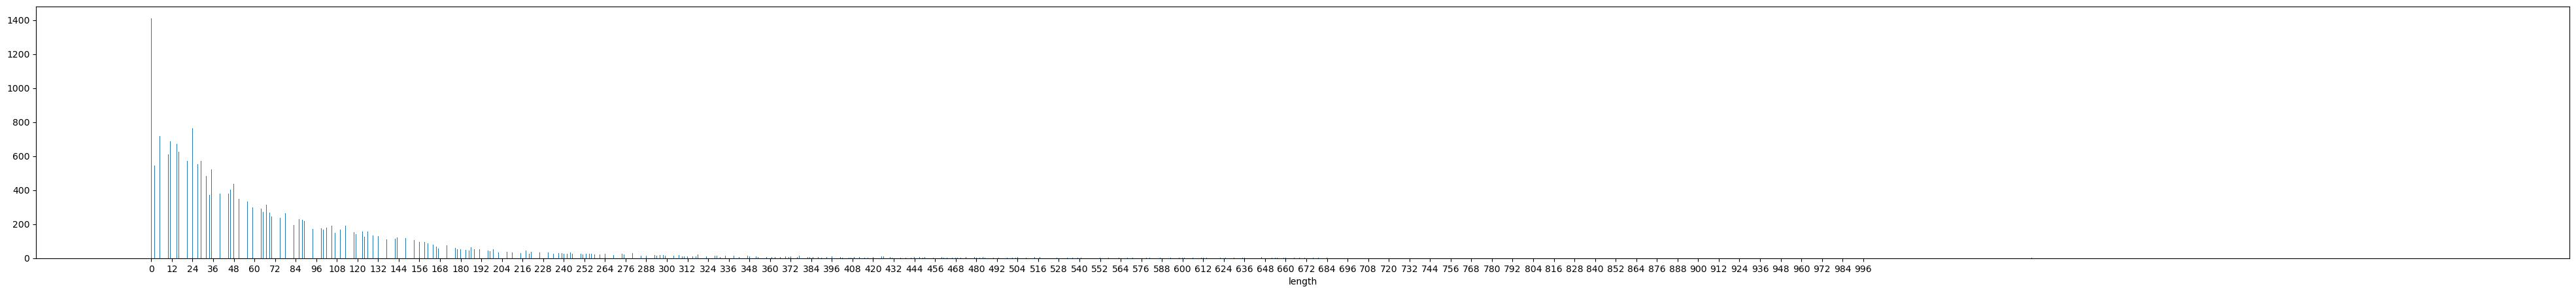

In [43]:
#데이터 분포 히스토그램 그리기
T = data["period_month"]
E = data["closed"]
plt.hist(T, bins = 10000)
plt.xlabel('length')
plt.xticks(np.arange(0, 1000, 12))
plt.rcParams["figure.figsize"] = (50,5)
plt.plot()

- 영업기간별로 분포 파악
- 초반 짧은 개월 사이에 폐업이 많이 일어난다. 

### (3) Kaplan_Meier 생존곡선 그리기

[]

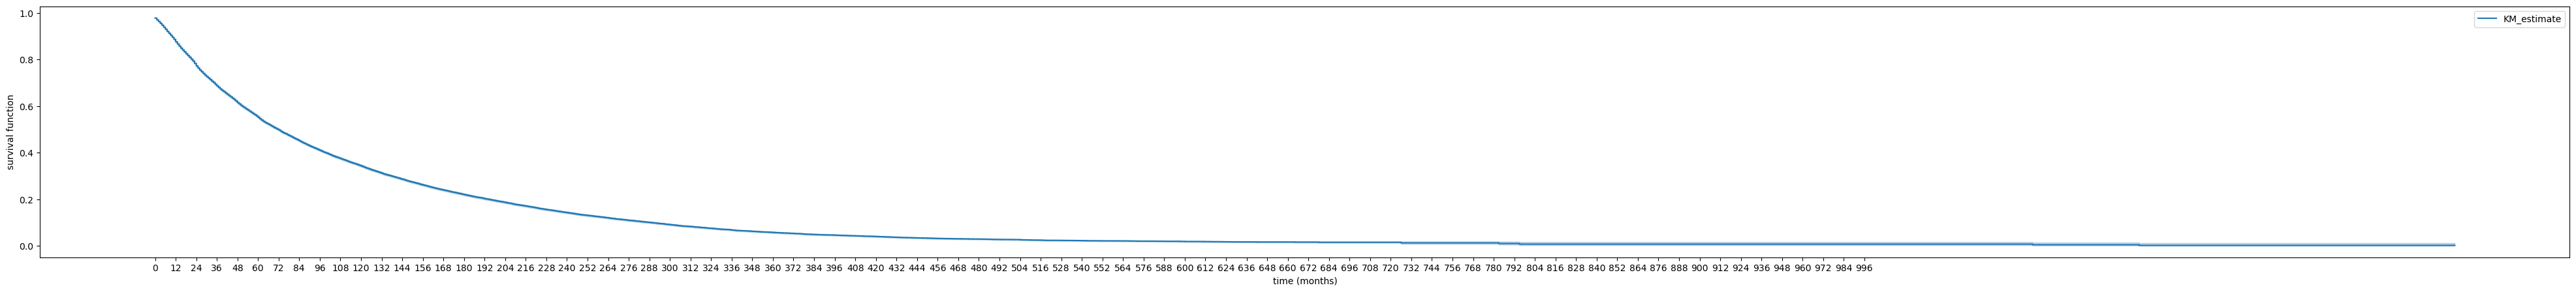

In [37]:
#km 모델에 데이터 적용 - 전체 데이터에 대한 생존곡선

#그래프 크기 지정
#인스턴스 생성
kmf = KaplanMeierFitter()
#데이터 넣기
kmf.fit(durations = T, event_observed = E)
#그래프 그리기
plot = kmf.plot_survival_function()
plot.set_xlabel('time (months)')
plot.set_ylabel('survival function')
plt.xticks(np.arange(0, 1000, 12))
plt.rcParams["figure.figsize"] = (50,5)
plt.plot()

- 전체 데이터에 대한 누적생존율을 보여주고 있다. 

In [11]:
#사용할 데이터 추출
#대학교 수 별로
data_univ_0 = data_k[data_k['univ_count'] == 0]
data_univ_1 = data_k[data_k['univ_count'] == 1]
data_univ_2 = data_k[data_k['univ_count'] == 2]
data_univ_3 = data_k[data_k['univ_count'] == 3]

<Axes: xlabel='Time (Months)', ylabel='Survival Rate'>

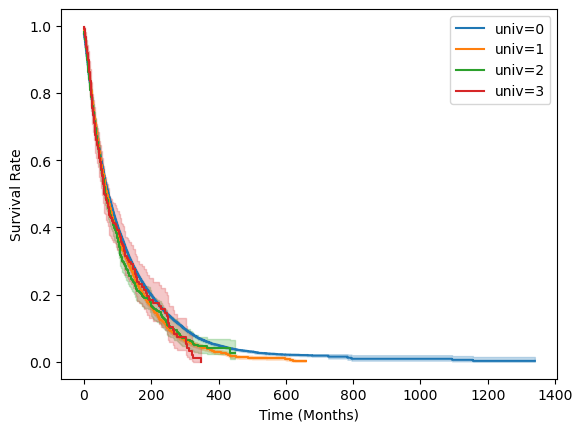

In [12]:
#Kaplan-Meier 생존곡선 비교
#대학교 개수를 기준으로 0, 1, 2, 3개(같은 동에 대학교 최대 3개 존재) 있는 집단의 생존률 비교하는 4개의 곡선 생성
kmf = KaplanMeierFitter()
kmf.fit(data_univ_0['period_month'], data_univ_0['closed'], label='univ=0')
ax_kmf = kmf.plot()
kmf.fit(data_univ_1['period_month'], data_univ_1['closed'], label='univ=1')
ax_kmf = kmf.plot(ax = ax_kmf)
kmf.fit(data_univ_2['period_month'], data_univ_2['closed'], label='univ=2')
ax_kmf = kmf.plot(ax = ax_kmf)
kmf.fit(data_univ_3['period_month'], data_univ_3['closed'], label='univ=3')
ax_kmf = kmf.plot(ax = ax_kmf)
#그래프 label값 설정
ax_kmf.set_xlabel('Time (Months)')
ax_kmf.set_ylabel('Survival Rate')
ax_kmf

### (4) log rank model
- 그룹별 차이가 통계적으로 유의한지 확인

In [13]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_0["period_month"], data_univ_1["period_month"], data_univ_0["closed"], data_univ_1["closed"]).p_value

2.0373912454903301e-07

In [14]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_0["period_month"], data_univ_2["period_month"], data_univ_0["closed"], data_univ_2["closed"]).p_value

0.01675962668442345

In [15]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_0["period_month"], data_univ_3["period_month"], data_univ_0["closed"], data_univ_3["closed"]).p_value

0.24302253223726403

In [16]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_1["period_month"], data_univ_2["period_month"], data_univ_1["closed"], data_univ_2["closed"]).p_value

0.40249509521964155

In [17]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_1["period_month"], data_univ_3["period_month"], data_univ_1["closed"], data_univ_3["closed"]).p_value

0.7638857894378461

In [18]:
from lifelines.statistics import logrank_test
from lifelines.statistics import logrank_test
#p-value 구하가
logrank_test(data_univ_2["period_month"], data_univ_3["period_month"], data_univ_2["closed"], data_univ_3["closed"]).p_value

0.8375906514123277

- p-value < 0.05 이면 그룹 간의 차이가 유의하다고 판단한다. 
- 그러므로 대학교 개수가 0개, 2개 그룹은 통계적으로 유의미한 차이가 있다. 
- 대학교 개수가 0개, 1개인 그룹은 통계적으로 유의미한 차이가 있다.

- 대학교 개수가 0개, 3개인 그룹은 통계적으로 유의미한 차이가 없다. 
- 대학교 개수가 1개, 2개인 그룹은 통계적으로 유의미한 차이가 없다. 
- 대학교 개수가 1개, 3개인 그룹은 통계적으로 유의미한 차이가 없다. 
- 대학교 개수가 2개, 3개인 그룹은 통계적으로 유의미한 차이가 없다. 

## 2. Cox 비례 위험 모형

### (1) 전체 데이터에 대하여 생존에 영향을 미치는 위험 요인들에 대한 분석

In [15]:
#Cox 모델에 넣기
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data.drop(columns='area'), duration_col = 'period_month', event_col = 'closed')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 57016 total observations, 17859 right-censored observations>
             duration col = 'period_month'
                event col = 'closed'
      baseline estimation = breslow
   number of observations = 57016
number of events observed = 39157
   partial log-likelihood = -390747.58
         time fit was run = 2023-12-09 14:07:20 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
franchise   -0.57       0.57       0.02            -0.61            -0.52                 0.54                 0.59
small_area   0.19       1.21       0.01             0.17             0.22                 1.19                 1.24
univ_count   0.09       1.09       0.02             0.06             0.12                 1.06                 1.13
univ_area    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
univ_pop    -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

             cmp to      z      p   -log2(p)
covariate                                   
franchise      0.00 -25.70 <0.005     481.46
small_area     0.00  16.86 <0.005     209.57
univ_count     0.00   5.90 <0.005      28.01
univ_area      0.00   3.61 <0.005      11.67
univ_pop       0.00  -3.69 <0.005      12.11
---
Concordance = 0.55
Partial AIC = 781505.15
log-likelihood ratio test = 1204.51 on 5 df
-log2(p) of ll-ratio test = 855.43

- 모두 p-value가 0.05보다 작아서 유의하다. 
- 보유면적과 재학생_전체_계는 한 단위가 늘어나도 위험도가 높아지지 않는다.

- 프랜차이즈의 Hazard Ratio = e^(-0.57) = 0.5655
- 그러므로 프랜차이즈는 프랜차이즈가 아닌 카페보다 (1-0.5655) = 43% 폐업 확률이 낮다.

- 소형면적의 Hazard Ratio = e^(0.19) = 1.2092
- 그러므로 소형면적의 카페는 소형면적이 아닌 카페보다 20% 폐업 확률이 높다.

- 학교 수가 1 단위 늘어날 때 폐업 위험이 9% 증가한다. (1.09배)

<Axes: xlabel='log(HR) (95% CI)'>

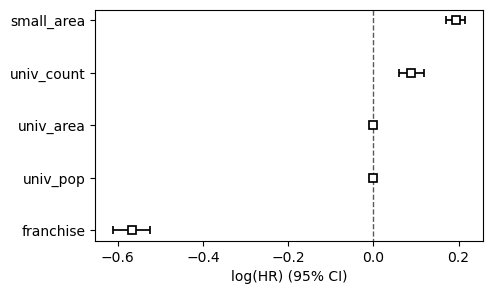

In [21]:
#모델 결과 시각화
plt.subplots(figsize = (5, 3))
cph.plot()

### (2) 그룹별 데이터에 대하여 생존에 영향을 미치는 위험 요인들에 대한 분석

- 동별 대학교 개수를 나타내는 univ_count를 기준으로 그룹을 생성하여 그룹별로 프랜차이즈 여부와 소형면적 여부가 폐업 위험에 미치는 영향을 비교하고자 한다. 

In [19]:
# univ_count = 0 인 그룹 분석
data_0 = data[data['univ_count'] == 0]
data_0 = data_0[['small_area', 'franchise', 'period_month', 'closed']]
cph1 = CoxPHFitter()
cph1.fit(data_0, duration_col = 'period_month', event_col = 'closed')
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 45655 total observations, 14360 right-censored observations>
             duration col = 'period_month'
                event col = 'closed'
      baseline estimation = breslow
   number of observations = 45655
number of events observed = 31295
   partial log-likelihood = -305477.38
         time fit was run = 2023-12-09 14:08:06 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
small_area   0.21       1.23       0.01             0.18             0.23                 1.20                 1.26
franchise   -0.53       0.59       0.02            -0.58            -0.49                 0.56                 0.61

             cmp to      z      p   -log2(p)
covariate                                   
small_area     0.00  16.05 <0.005     190.19
franchise      0.00 -21.61 <0.005     341.52
---
Concordance = 0.55
Partial AIC = 610958.76
log-likelihood ratio test = 876.37 on 2 df
-log2(p) of ll-ratio test = 632.17

In [24]:
# univ_count = 1 인 그룹 분석
data_1 = data[data['univ_count'] == 1]
data_1 = data_1[['small_area', 'franchise', 'period_month', 'closed']]
cph2 = CoxPHFitter()
cph2.fit(data_1, duration_col = 'period_month', event_col = 'closed')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 9871 total observations, 2958 right-censored observations>
             duration col = 'period_month'
                event col = 'closed'
      baseline estimation = breslow
   number of observations = 9871
number of events observed = 6913
   partial log-likelihood = -56732.09
         time fit was run = 2023-12-09 14:09:01 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
small_area   0.14       1.16       0.03             0.09             0.20                 1.10                 1.22
franchise   -0.69       0.50       0.05            -0.80            -0.59                 0.45                 0.55

             cmp to      z      p   -log2(p)
covariate                                   
small_area     0.00   5.36 <0.005      23.50
franchise      0.00 -13.23 <0.005     130.41
---
Concordance = 0.56
Partial AIC = 113468.18
log-likelihood ratio test = 262.64 on 2 df
-log2(p) of ll-ratio test = 189.45

In [25]:
# univ_count = 2 인 그룹 분석
data_2 = data[data['univ_count'] == 2]
data_2 = data_2[['small_area', 'franchise', 'period_month', 'closed']]
cph3 = CoxPHFitter()
cph3.fit(data_2, duration_col = 'period_month', event_col = 'closed')
cph3.print_summary()

<lifelines.CoxPHFitter: fitted with 1121 total observations, 407 right-censored observations>
             duration col = 'period_month'
                event col = 'closed'
      baseline estimation = breslow
   number of observations = 1121
number of events observed = 714
   partial log-likelihood = -4335.80
         time fit was run = 2023-12-09 14:09:06 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
small_area  -0.01       0.99       0.08            -0.18             0.15                 0.84                 1.16
franchise   -0.79       0.45       0.16            -1.10            -0.48                 0.33                 0.62

             cmp to     z      p   -log2(p)
covariate                                  
small_area     0.00 -0.18   0.86       0.22
franchise      0.00 -5.04 <0.005      21.05
---
Concordance = 0.54
Partial AIC = 8675.61
log-likelihood ratio test = 32.17 on 2 df
-log2(p) of ll-ratio test = 23.21

In [30]:
# univ_count = 3 인 그룹 분석
data_3 = data[data['univ_count'] == 3]
data_3 = data_3[['small_area', 'franchise', 'period_month', 'closed']]
cph4 = CoxPHFitter()
cph4.fit(data_3, duration_col = 'period_month', event_col = 'closed')
cph4.print_summary()

<lifelines.CoxPHFitter: fitted with 369 total observations, 134 right-censored observations>
             duration col = 'period_month'
                event col = 'closed'
      baseline estimation = breslow
   number of observations = 369
number of events observed = 235
   partial log-likelihood = -1148.48
         time fit was run = 2023-12-09 14:45:55 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
small_area   0.36       1.43       0.14             0.07             0.64                 1.08                 1.90
franchise   -0.40       0.67       0.29            -0.97             0.17                 0.38                 1.18

             cmp to     z    p   -log2(p)
covariate                                
small_area     0.00  2.48 0.01       6.24
franchise      0.00 -1.39 0.17       2.59
---
Concordance = 0.57
Partial AIC = 2300.96
log-likelihood ratio test = 9.62 on 2 df
-log2(p) of ll-ratio test = 6.94